In [31]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import string
import re
from collections import Counter
import statsmodels.api as sm
import statsmodels.formula.api as smf


from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from datetime import datetime
import datetime as dt
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

df_completo = pd.read_csv("datos_para_entrenar.csv")
df_completo.drop(['Unnamed: 0'], axis=1, inplace=True)
print(df_completo.shape)
df_completo.head(3)

(37426, 36)


,id,rooms,bathrooms,surface_total,surface_covered,price,title,description,barrio,scaled_surface_total,...,amenities,estrenar,ascensor,contrafrente,frente,luminoso,ph,duplex,triplex,casa
0,2,1.0,1.0,34.0,31.0,109183.0,venta emprendimiento 9 de julio estudios 1 y 2...,venta emprendimiento 9 de julio estudios 1 y 2...,santelmo,3.555348,...,SI,SI,NO,NO,NO,NO,NO,NO,NO,NO
1,4,6.0,2.0,190.0,178.0,550000.0,venta departamento 4 dormitorios mas depend. e...,venta piso de 6 ambientes en 190 m2 totales e...,palermo,5.252273,...,NO,NO,NO,NO,SI,SI,NO,NO,NO,NO
2,7,3.0,3.0,161.0,149.0,1600000.0,espectacular departamento en alvear tower!!!,el edificio esta ubicado cercano a varios siti...,puertomadero,5.087596,...,SI,NO,NO,NO,NO,NO,NO,NO,NO,NO


In [32]:
df_completo.columns

Index(['id', 'rooms', 'bathrooms', 'surface_total', 'surface_covered', 'price',
       'title', 'description', 'barrio', 'scaled_surface_total',
       'scaled_surface_covered', 'scaled_price', 'bocas_subte',
       'estacion_tren', 'expensas', 'amoblado', 'jardin', 'patio', 'terraza',
       'aire_acond', 'mascota', 'balcon', 'pileta', 'cochera', 'laundry',
       'summ', 'amenities', 'estrenar', 'ascensor', 'contrafrente', 'frente',
       'luminoso', 'ph', 'duplex', 'triplex', 'casa'],
      dtype='object')

In [33]:
print("Datos faltantes")
print(df_completo.isnull().sum())

Datos faltantes
id                        0
rooms                     0
bathrooms                 0
surface_total             0
surface_covered           0
price                     0
title                     0
description               0
barrio                    0
scaled_surface_total      0
scaled_surface_covered    0
scaled_price              0
bocas_subte               0
estacion_tren             0
expensas                  0
amoblado                  0
jardin                    0
patio                     0
terraza                   0
aire_acond                0
mascota                   0
balcon                    0
pileta                    0
cochera                   0
laundry                   0
summ                      0
amenities                 0
estrenar                  0
ascensor                  0
contrafrente              0
frente                    0
luminoso                  0
ph                        0
duplex                    0
triplex                   0
casa

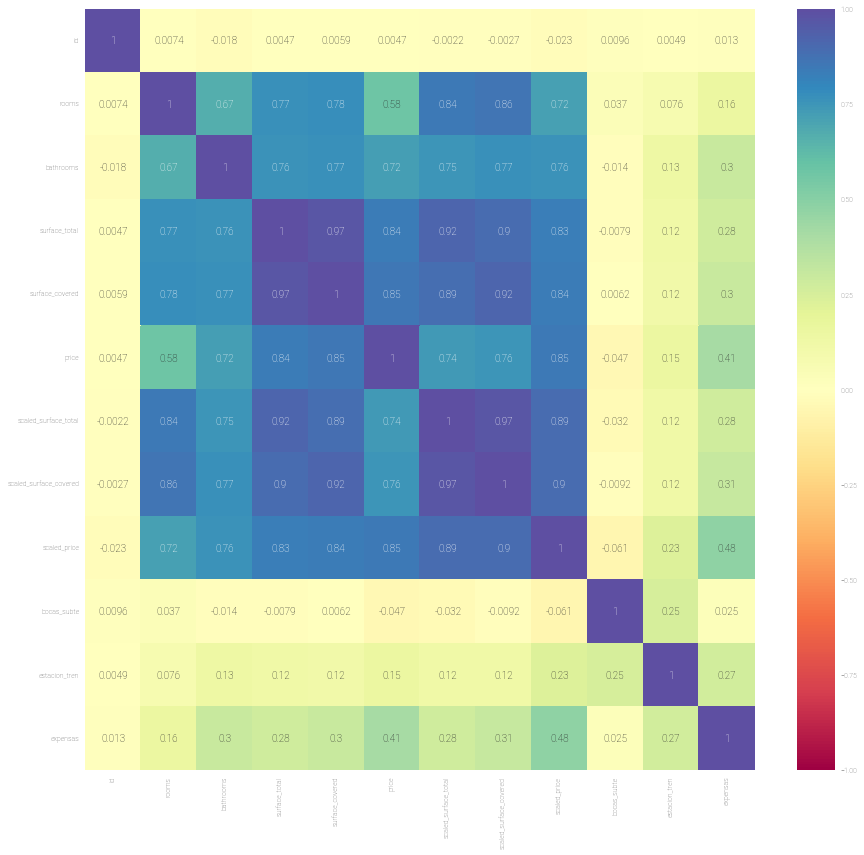

In [34]:
# Se grafican las correlaciones entre las variables
plt.figure(figsize=(15, 14))
sns.heatmap(df_completo.corr(), annot=True, cmap='Spectral', vmin=-1, vmax=1)
plt.show()

In [35]:
df_completo.drop(['barrio','scaled_surface_total','surface_total', 'surface_covered', 'price','id','bocas_subte','title','description'], axis = 1, inplace = True)
df_completo = df_completo.reset_index(drop=True)
df_completo.head(3)

,rooms,bathrooms,scaled_surface_covered,scaled_price,estacion_tren,expensas,amoblado,jardin,patio,terraza,...,amenities,estrenar,ascensor,contrafrente,frente,luminoso,ph,duplex,triplex,casa
0,1.0,1.0,3.465736,11.600790,0,4732.02,NO,NO,NO,NO,...,SI,SI,NO,NO,NO,NO,NO,NO,NO,NO
1,6.0,2.0,5.187386,13.217675,3,4611.37,NO,NO,NO,NO,...,NO,NO,NO,NO,SI,SI,NO,NO,NO,NO
2,3.0,3.0,5.010635,14.285515,0,6418.58,NO,NO,NO,NO,...,SI,NO,NO,NO,NO,NO,NO,NO,NO,NO


In [36]:
lst_cat = ['amoblado', 'jardin', 'patio', 'terraza', 'aire_acond', 'mascota',
       'balcon', 'pileta', 'cochera', 'laundry', 'summ', 'amenities',
       'estrenar', 'ascensor', 'contrafrente', 'frente', 'luminoso', 'ph',
       'duplex', 'triplex', 'casa']

for col in lst_cat:
    
    df_completo[col] = df_completo[col].astype('category')
    df_completo[col] = df_completo[col] .cat.codes
    

In [37]:
df_completo.dtypes

rooms                     float64
bathrooms                 float64
scaled_surface_covered    float64
scaled_price              float64
estacion_tren               int64
expensas                  float64
amoblado                     int8
jardin                       int8
patio                        int8
terraza                      int8
aire_acond                   int8
mascota                      int8
balcon                       int8
pileta                       int8
cochera                      int8
laundry                      int8
summ                         int8
amenities                    int8
estrenar                     int8
ascensor                     int8
contrafrente                 int8
frente                       int8
luminoso                     int8
ph                           int8
duplex                       int8
triplex                      int8
casa                         int8
dtype: object

In [38]:
df_completo.shape

(37426, 27)

In [39]:
df_modelo = df_completo.copy()

##### Seleccion de variables

In [40]:
my_r = df_modelo.corr(method="spearman")
my_r

,rooms,bathrooms,scaled_surface_covered,scaled_price,estacion_tren,expensas,amoblado,jardin,patio,terraza,...,amenities,estrenar,ascensor,contrafrente,frente,luminoso,ph,duplex,triplex,casa
rooms,1.000000,0.680517,0.882997,0.737066,0.071503,0.143547,-0.068418,0.052717,0.025584,-0.028137,...,-0.075704,-0.158466,-0.027334,-0.027189,0.052631,-0.003551,0.028860,0.074056,0.067001,0.058496
bathrooms,0.680517,1.000000,0.740928,0.731757,0.127505,0.261704,-0.028611,0.053140,-0.014336,0.035306,...,0.111091,-0.058294,-0.013816,-0.052199,0.020809,-0.063286,-0.016086,0.091193,0.094781,0.065790
scaled_surface_covered,0.882997,0.740928,1.000000,0.877013,0.104826,0.249915,-0.046864,0.056401,0.012776,0.020785,...,0.024607,-0.116143,-0.024116,-0.046746,0.042562,-0.052871,0.014936,0.112464,0.087948,0.058280
scaled_price,0.737066,0.731757,0.877013,1.000000,0.235529,0.427674,-0.009328,0.073391,-0.023514,0.065332,...,0.167931,-0.063304,-0.030932,-0.061249,0.022194,-0.080109,-0.029479,0.113418,0.091902,0.054220
estacion_tren,0.071503,0.127505,0.104826,0.235529,1.000000,0.446818,-0.007212,0.047334,-0.022778,0.032219,...,0.070479,-0.003184,-0.029744,-0.008088,-0.010621,-0.015127,-0.019541,0.039174,0.029211,0.037697
expensas,0.143547,0.261704,0.249915,0.427674,0.446818,1.000000,0.060902,0.032507,-0.061811,-0.024790,...,0.148330,-0.096986,-0.072608,-0.069449,-0.071093,-0.069952,-0.052984,0.023696,0.051506,0.006696
amoblado,-0.068418,-0.028611,-0.046864,-0.009328,-0.007212,0.060902,1.000000,-0.004006,-0.013673,-0.006854,...,0.076839,-0.023803,0.030215,0.028372,-0.016437,0.006652,-0.005104,0.010206,0.012350,-0.018377
jardin,0.052717,0.053140,0.056401,0.073391,0.047334,0.032507,-0.004006,1.000000,0.018077,0.010769,...,0.037728,-0.019664,-0.005532,0.000397,-0.019484,-0.007472,0.001006,0.010778,0.003625,0.052426
patio,0.025584,-0.014336,0.012776,-0.023514,-0.022778,-0.061811,-0.013673,0.018077,1.000000,-0.002829,...,-0.049075,-0.009775,0.018449,0.014778,-0.011099,-0.029664,0.110537,0.003011,-0.013788,0.060766
terraza,-0.028137,0.035306,0.020785,0.065332,0.032219,-0.024790,-0.006854,0.010769,-0.002829,1.000000,...,0.103391,0.077326,0.087240,0.005377,0.026911,-0.010168,0.047825,0.110594,0.111128,0.051039


In [41]:
# Todos las variables categóricas se codificarán a variables dummies
X = df_modelo.loc[:, df_modelo.columns != 'scaled_price']
y = df_modelo['scaled_price']

In [42]:
print(df_modelo.columns)

Index(['rooms', 'bathrooms', 'scaled_surface_covered', 'scaled_price',
       'estacion_tren', 'expensas', 'amoblado', 'jardin', 'patio', 'terraza',
       'aire_acond', 'mascota', 'balcon', 'pileta', 'cochera', 'laundry',
       'summ', 'amenities', 'estrenar', 'ascensor', 'contrafrente', 'frente',
       'luminoso', 'ph', 'duplex', 'triplex', 'casa'],
      dtype='object')


In [43]:
#X_dum = pd.get_dummies(X, drop_first=True, dummy_na=False)
#X_dum.shape

In [44]:
print("Datos faltantes")
print(df_modelo.isnull().sum())

Datos faltantes
rooms                     0
bathrooms                 0
scaled_surface_covered    0
scaled_price              0
estacion_tren             0
expensas                  0
amoblado                  0
jardin                    0
patio                     0
terraza                   0
aire_acond                0
mascota                   0
balcon                    0
pileta                    0
cochera                   0
laundry                   0
summ                      0
amenities                 0
estrenar                  0
ascensor                  0
contrafrente              0
frente                    0
luminoso                  0
ph                        0
duplex                    0
triplex                   0
casa                      0
dtype: int64


In [45]:
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor
import utils as u
from sklearn.tree import DecisionTreeRegressor

In [46]:
m1 = RandomForestRegressor()
m1.fit(X, y)
m2 = DecisionTreeRegressor()
m2.fit(X, y)
m3 = GradientBoostingRegressor()
m3.fit(X, y)
m4 = xgb.XGBRegressor()
m4.fit(X,y)


l_re = u.recursive_feature_elimination(X,y,20)
l_lasso = u.lasoCV(X,y).index
var_imp_m1 = pd.DataFrame({
 'feature':X.columns, 
 'v_importance':m1.feature_importances_.tolist()
 })
var_imp_m2 = pd.DataFrame({
 'feature':X.columns, 
 'v_importance':m2.feature_importances_.tolist()
 })

var_imp_m3 = pd.DataFrame({
 'feature':X.columns, 
 'v_importance':m3.feature_importances_.tolist()
 })

var_imp_m4 = pd.DataFrame({
 'feature':X.columns, 
 'v_importance':m4.feature_importances_.tolist()
 })

l_m1 = var_imp_m1.feature[var_imp_m1['v_importance'] >= 0.05].to_list()
l_m2 = var_imp_m2.feature[var_imp_m2['v_importance'] >= 0.05].to_list()
l_m3 = var_imp_m3.feature[var_imp_m3['v_importance'] >= 0.05].to_list()
l_m4 = var_imp_m4.feature[var_imp_m4['v_importance'] >= 0.05].to_list()

conteo = Counter(l_re.tolist() + l_lasso.tolist() + l_m1  + l_m2 + l_m3 + l_m4 )
df_conteo = pd.DataFrame.from_dict(conteo, orient='index').reset_index()
df_conteo = df_conteo.rename(columns={'index':'event', 0:'count'})


/home/cdsw/.conda/envs/multi/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/home/cdsw/.conda/envs/multi/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_features_to_select=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/home/cdsw/.conda/envs/multi/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_features_to_select=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/home/cdsw/.conda/envs/multi/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_features_to_sel

In [71]:
lista_variables = df_conteo.event[df_conteo['count'] >= 2].to_list()
lista_variables

['bathrooms',
 'scaled_surface_covered',
 'mascota',
 'pileta',
 'cochera',
 'amenities',
 'ph',
 'expensas']

In [128]:
df_modelo_filtrado = df_modelo[['bathrooms',
 'scaled_surface_covered',
 'estacion_tren',
 'pileta',
 'cochera',
 'amenities',
 'balcon',
 'expensas']]

In [129]:
df_modelo_filtrado.head(3)

,bathrooms,scaled_surface_covered,estacion_tren,pileta,cochera,amenities,balcon,expensas
0,1.0,3.465736,0,0,1,1,1,4732.02
1,2.0,5.187386,3,0,1,0,1,4611.37
2,3.0,5.010635,0,1,1,1,0,6418.58


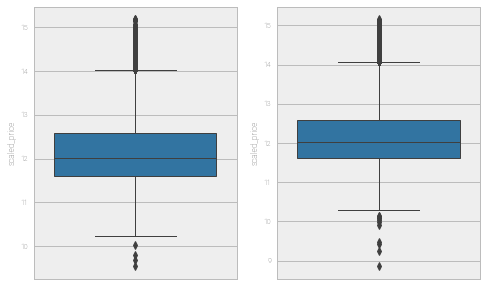

In [130]:
X_train, X_test, y_train, y_test = train_test_split(df_modelo_filtrado,y,test_size = 0.30, random_state = 2402)

plt.subplots(figsize=(8, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y = (y_test))

plt.subplot(1, 2, 2)
sns.boxplot(y = (y_train))

In [131]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 500, random_state = 2402)
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=2402)

In [132]:
# Get numerical feature importances
feature_list = list(X_train.columns)
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: scaled_surface_covered Importance: 0.84
Variable: expensas             Importance: 0.08
Variable: pileta               Importance: 0.02
Variable: cochera              Importance: 0.02
Variable: bathrooms            Importance: 0.01
Variable: estacion_tren        Importance: 0.01
Variable: amenities            Importance: 0.01
Variable: balcon               Importance: 0.01


In [133]:
print("Para testing")
print_evaluate(np.expm1(y_test), np.expm1(rf.predict(X_test)))

Para testing
MAE: 47987.451040938344
MSE: 13879119599.138618
RMSE: 117809.67532057212
R2 Square 0.8955034101070424
__________________________________


In [134]:
print("Para training")
print_evaluate(np.expm1(y_train), np.expm1(rf.predict(X_train)))

Para training
MAE: 25283.175102421155
MSE: 3558151149.6718006
RMSE: 59650.24014764568
R2 Square 0.972289922742679
__________________________________


In [135]:
def graficas_resultados(X_,y_, model):
    predictions =  np.expm1(model.predict(X_))
    result = pd.DataFrame({'predict': predictions})
    result['y_test'] = np.expm1(y_).tolist()

    X_plot = np.expm1(y_).to_numpy()#np.linspace(0, 7, 100)
    Y_plot = np.expm1(y_).to_numpy()#10*X_plot+5

    g = sns.FacetGrid(result, size = 6)
    g = g.map(plt.scatter, "y_test", "predict", edgecolor="w")
    plt.plot(X_plot, Y_plot, color='r')
    plt.show()
    

/home/cdsw/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


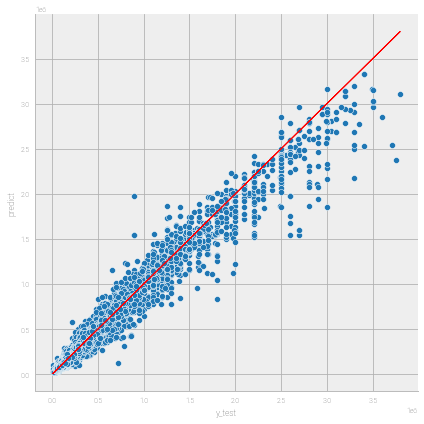

In [136]:
graficas_resultados(X_train,y_train, rf)

/home/cdsw/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


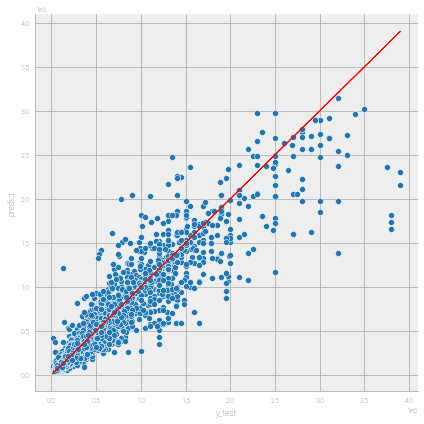

In [137]:
graficas_resultados(X_test,y_test, rf)

In [139]:
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [140]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 20,25,30],
    'max_features': [3,4,5,6],
    'min_samples_split': [5,10,11],
    'n_estimators': [600,700,838,1000]
}
# Create a based model


rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [141]:
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 301 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed: 12.9min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [10, 20, 25, 30],
                         'max_features': [3, 4, 5, 6],
                         'min_samples_split': [5, 10, 11],
                         'n_estimators': [600, 700, 838, 1000]},
             verbose=2)

In [142]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 4,
 'min_samples_split': 5,
 'n_estimators': 1000}

In [143]:
best_grid = grid_search.best_estimator_

In [144]:
best_grid.fit(X_train, y_train)


RandomForestRegressor(max_depth=20, max_features=4, min_samples_split=5,
                      n_estimators=1000)

In [145]:
print("Para testing")
print_evaluate(np.expm1(y_test), np.expm1(best_grid.predict(X_test)))

Para testing
MAE: 48902.751870317436
MSE: 13854802625.913788
RMSE: 117706.42559314164
R2 Square 0.8956864938221413
__________________________________


In [146]:
print("Para training")
print_evaluate(np.expm1(y_train), np.expm1(best_grid.predict(X_train)))

Para training
MAE: 31959.200239297123
MSE: 5925760849.942875
RMSE: 76978.96368452147
R2 Square 0.9538515133131792
__________________________________


/home/cdsw/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


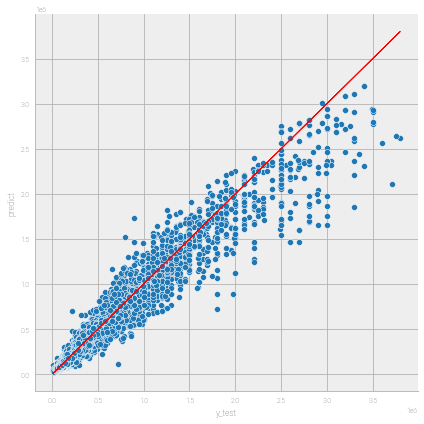

In [147]:
graficas_resultados(X_train,y_train, best_grid)

/home/cdsw/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


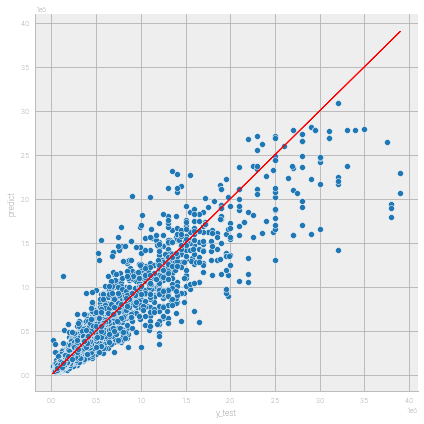

In [148]:
graficas_resultados(X_test,y_test, best_grid)

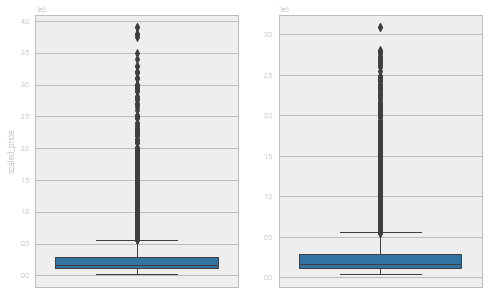

In [149]:
predicted = np.expm1(best_grid.predict(X_test))
plt.subplots(figsize=(8, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y = round(np.expm1(y_test),2))

plt.subplot(1, 2, 2)
sns.boxplot(y = predicted)